## Fe Eperiments
December, 2023
Experiments by jmchan@lbl.gov, awojdyla@lbl.gov

The Pilatus deector is now about 1000 mm from the sample position

We do not use bluesky -- just epics call through python.

partial log: go.lbl.gov/bl531/log2023

In [1]:
import epics
import numpy
from PIL import Image

In [96]:
# testing EPICS with the monochromator
mono_angle_deg = 26
epics.caput('bl531_xps1:mono_angle_deg',mono_angle_deg)

1

In [585]:
#testing EPICS
epics.caput('13PIL1:cam1:Acquire',1)
last_filename_ascii = epics.caget('13PIL1:cam1:FullFileName_RBV')
last_filename = bytes(last_filename_ascii).decode()


In [597]:
last_filename_ascii = epics.caget('13PIL1:cam1:FullFileName_RBV')
last_filename = bytes(last_filename_ascii).decode()
print(last_filename[13:-1])

BinaryNP_231222_WAXS_4799.tif


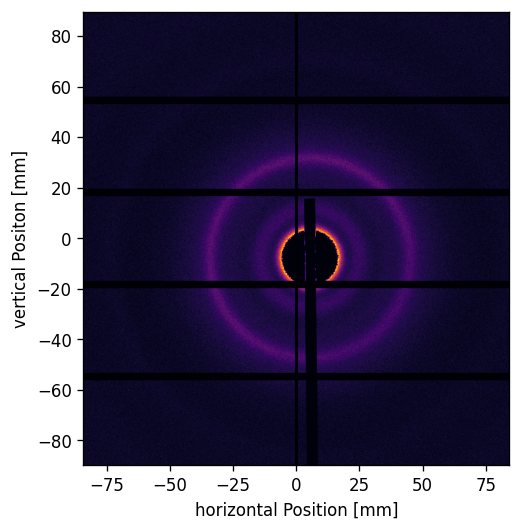

In [598]:
#read a image
import numpy as np
from PIL import Image

# filepath = '/mnt/pilatus/' + 'AuNP_231222_WAXS_4050.tif'
# filepath = '/mnt/pilatus/' + 'FeNP_231222_WAXS_4056.tif'
filepath = '/mnt/pilatus/' + last_filename[13:-1]
# read the image
im_tiff = Image.open(filepath)
# make the image a numpy array so that we can process it
im_np = np.squeeze(np.array(im_tiff.getdata()).reshape(im_tiff.size[1], im_tiff.size[0], 1))

# dealing with dyanmic range
im_np[np.where(im_np>100.0)] =0

import matplotlib.pyplot as plt
dx_m = 172e-6
Nx_px = 981
Ny_px = 1043
Dx_m = Nx_px*dx_m
Dy_m = Ny_px*dx_m

fig=plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
extent = (-Dx_m/2 * 1e3, +Dx_m/2 * 1e3, -Dy_m/2 * 1e3, +Dy_m/2 * 1e3)

mask = im_np > np.max(im_np)
im_np[mask]=0

plt.imshow(im_np, extent=extent, cmap = 'inferno')
plt.xlabel('horizontal Position [mm]')
plt.ylabel('vertical Positon [mm]')
plt.show()

In [596]:
from time import sleep as time_sleep
# there's no settling time in EPICS so we use `sleep` to enforce a guard time after motion

Es_eV = np.linspace(7500, 6500, 101)
# Es_eV = np.linspace(9000, 10000, 11)
# Es_eV = np.linspace(6850, 6910, 61)
# Es_eV = np.linspace(7320, 7380, 61)
# Es_eV = np.linspace(7170, 7230, 61)

epics.caput('bl531_xps1:mono_angle_deg',mono_deg(Es_eV[0]))
time_sleep(10)
filenames = ()
for i_e in range(len(Es_eV)):
    mono_angle_deg = mono_deg(Es_eV[i_e])
    epics.caput('bl531_xps1:mono_angle_deg',mono_angle_deg)
    #print(mono_angle_deg)
    time_sleep(2)
    epics.caput('13PIL1:cam1:Acquire',1)
    time_sleep(3)
    last_filename_ascii = epics.caget('13PIL1:cam1:FullFileName_RBV')
    last_filename = bytes(last_filename_ascii).decode()[13:-1]
    filenames += (last_filename,)

In [ ]:
# matt and jonathan's edits on dec 21, 2023

In [342]:
# single image acquisition
aqtime_s = 1
epics.caput('13PIL1:cam1:AcquireTime', aqtime_s * 1.5)
epics.caput('13PIL1:cam1:AcquirePeriod', aqtime_s)
epics.caput('13PIL1:cam1:Acquire',1)
time_sleep(10)
last_filename_ascii = epics.caget('13PIL1:cam1:FullFileName_RBV')
last_filename = bytes(last_filename_ascii).decode()
print(last_filename)

/mnt/data531/CaCO3-SRHA_exp07_20231221_2576.tif 


In [513]:

# Es_eV = np.linspace(7200, 7000, 101)    # jonathan's scan for images 386 to 446

Es_eV = np.linspace(9500, 3500, 61) 
Es_eV = np.linspace(3900, 3700, 101)    # mrl images 725-825
Es_eV = np.linspace(10000,10000, 1)

# mrl Ca K-edge
Es_eV = np.linspace(4500,3500, 101)     # mrl first attempt to find the Ca K-edge on Calcium Acetate powder... stopped at image 937, i assume b/c the energy got too low
Es_eV = np.linspace(5000,4000, 101)     # mrl attempts to find the Ca K-edge on Calcium Acetate powder
Es_eV = np.linspace(6000,5000, 101)     
Es_eV = np.linspace(6200, 5800, 101)    # we see some absorbance in this range, but idk what it is... doesnt look like an edge 
Es_eV = np.linspace(6030, 5930, 101)
Es_eV = np.linspace(4200, 3800, 101)    # expect Ca K-edge at 4030 eV, so lets try this range... maybe see edge at 3870 eV or so
Es_eV = np.linspace(3920, 3820, 201)
Es_eV = np.linspace(3900, 3850, 201)    # fine-step Ca K-edge scan... takes 20 mins :)

#Es_eV = np.linspace(10000, 4000, 61)   # images 2043-2103 for exp05, 2172-2232 for exp04
#Es_eV = np.linspace(10500, 10500, 1)


# mrl Fe K-edge time

#Es_eV = np.linspace(10500, 10500, 1)
#Es_eV = np.linspace(7500,6500, 101)           # 7.12 keV is expected Fe K-edge, start w large sweep
Es_eV = np.linspace(7350, 7150, 101)        # edge appears to be at 7220 eV or so, per my Fe(OH)3 sample's absorbance




epics.caput('bl531_xps1:mono_angle_deg',mono_deg(Es_eV[0]))
time_sleep(5)
filenames = ()
for i_e in range(len(Es_eV)):
    mono_angle_deg = mono_deg(Es_eV[i_e])
    
    epics.caput('bl531_xps1:mono_angle_deg',mono_angle_deg)
    time_sleep(2)

    aqtime_s = 2
    epics.caput('13PIL1:cam1:AcquireTime', aqtime_s * 1.5)
    epics.caput('13PIL1:cam1:AcquirePeriod', aqtime_s)
    epics.caput('13PIL1:cam1:Acquire',1)
    time_sleep(5)

    last_filename_ascii = epics.caget('13PIL1:cam1:FullFileName_RBV')
    last_filename = bytes(last_filename_ascii).decode()[13:-1]
    filenames += (last_filename,)

In [414]:
#epics.caput('13PIL1:cam1:DelayTime', 0.25)
#epics.caget('13PIL1:cam1:DelayTime')

1

In [514]:
#last_filename_ascii = epics.caget('13PIL1:cam1:FullFileName_RBV')
#last_filename = bytes(last_filename_ascii).decode()[13:-1]
last_filename

'FeNOM_20231221_3938.tif'

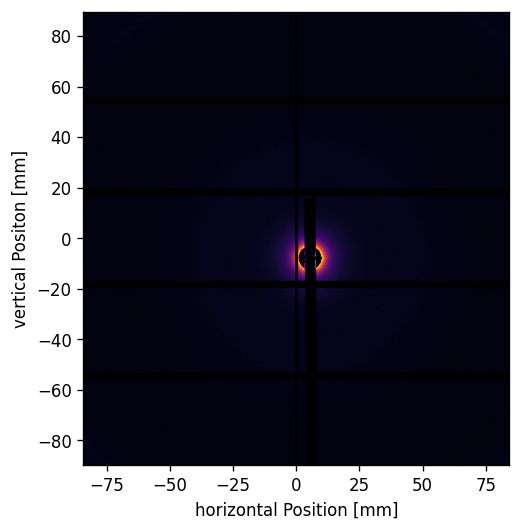

In [516]:
filepath = '/mnt/pilatus/' + last_filename#[13:-1] 
filepath = '/mnt/pilatus/' + 'FeNOM_20231221_3756.tif'

# read the image
im_tiff = Image.open(filepath)
# make the image a numpy array so that we can process it
im_np = np.squeeze(np.array(im_tiff.getdata()).reshape(im_tiff.size[1], im_tiff.size[0], 1))

# dealing with dyanmic range
im_np[np.where(im_np>1000.0)] =0

import matplotlib.pyplot as plt
dx_m = 172e-6
Nx_px = 981
Ny_px = 1043
Dx_m = Nx_px*dx_m
Dy_m = Ny_px*dx_m

fig=plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
extent = (-Dx_m/2 * 1e3, +Dx_m/2 * 1e3, -Dy_m/2 * 1e3, +Dy_m/2 * 1e3)

mask = im_np > np.max(im_np)
im_np[mask]=0

plt.imshow(im_np, extent=extent, cmap = 'inferno')
plt.xlabel('horizontal Position [mm]')
plt.ylabel('vertical Positon [mm]')
plt.show()

In [517]:
img = ()
for i_e in range(len(Es_eV)):
    filepath = '/mnt/pilatus/' + filenames[i_e] 
    # read the image
    im_tiff = Image.open(filepath)
    # make the image a numpy array so that we can process it
    im_np = np.squeeze(np.array(im_tiff.getdata()).reshape(im_tiff.size[1], im_tiff.size[0], 1))
    img += (im_np,)


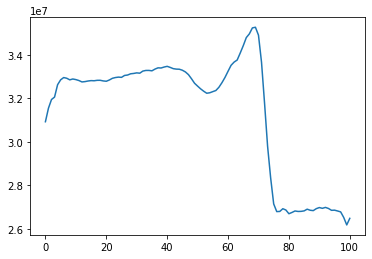

In [518]:
# mrl tracking flux to see if i can see the Ca K-edge

fig, ax = plt.subplots()

flux = Es_eV*0
for i_e in range(len(Es_eV)):
    flux[i_e] = np.sum(img[i_e])#[0:500, 0:200])

ax.plot(flux)
#ax.set_xlim([0,100])
#ax.set_ylim([2.4e6, 2.8e6])


In [205]:
np.shape(img[i_e][0:200, 0:200])

(200, 200)

In [490]:
Es_eV[65]

7220.0

In [440]:
Es_eV[80]

6860.0

60

In [ ]:
# previous script from dec 20, 2023

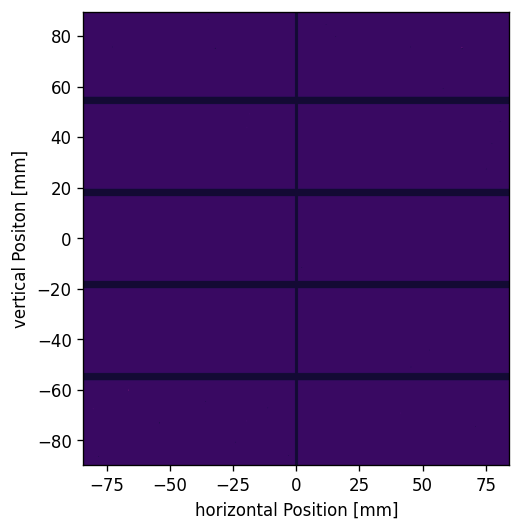

In [48]:
import numpy as np
from PIL import Image
from time import sleep as time_sleep

#testing EPICS
aqtime_s = 0.1
epics.caput('13PIL1:cam1:AcquireTime', aqtime_s)
epics.caput('13PIL1:cam1:Acquire',1)
last_filename_ascii = epics.caget('13PIL1:cam1:FullFileName_RBV')
last_filename = bytes(last_filename_ascii).decode()

time_sleep(2)

#filepath = '/mnt/pilatus/' + last_filename[13:-1] 

filepath = '/mnt/data531/AgB_20231221_654.tif'

# read the image
im_tiff = Image.open(filepath)
# make the image a numpy array so that we can process it
im_np = np.squeeze(np.array(im_tiff.getdata()).reshape(im_tiff.size[1], im_tiff.size[0], 1))

# dealing with dyanmic range
im_np[np.where(im_np>10.0)] =0

import matplotlib.pyplot as plt
dx_m = 172e-6
Nx_px = 981
Ny_px = 1043
Dx_m = Nx_px*dx_m
Dy_m = Ny_px*dx_m

fig=plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
extent = (-Dx_m/2 * 1e3, +Dx_m/2 * 1e3, -Dy_m/2 * 1e3, +Dy_m/2 * 1e3)

mask = im_np > np.max(im_np)
im_np[mask]=0

plt.imshow(im_np, extent=extent, cmap = 'inferno')
plt.xlabel('horizontal Position [mm]')
plt.ylabel('vertical Positon [mm]')
plt.show()

In [13]:
#physical constants
h_m2kgps = 6.6261e-34
c_mps    = 299792458   
e_eV     = 6.2415e+18
# Silicon spacing (for Bragg condition)
Si_m = 5.43E-10
a_Si111_m = Si_m/np.sqrt(1^2+1^2+1^2)
# Monochromotor offset
mono_offset_deg = 12.787
mono_offset_deg = 13.017 # new calibration
#Wavelength from energy
lambda_m = lambda E_eV : h_m2kgps*c_mps*e_eV/E_eV
#Bragg angle from Wavelength
bragg_deg = lambda E_eV: np.arcsin(lambda_m(E_eV)/(2*a_Si111_m))*180/np.pi
# Mono angle from Bragg angle
mono_deg = lambda E_eV: bragg_deg(E_eV)+mono_offset_deg
mono_deg(7000)

29.42576899316475

In [22]:
Es_eV = np.linspace(9000, 9000, 1) # jonathan's scan for images 447 to 457
Es_eV

array([9000.])

25.709182679068185

In [49]:
from time import sleep as time_sleep
# there's no settling time in EPICS so we use `sleep` to enforce a guard time after motion

# Es_eV = np.linspace(7200, 7000, 101)    # jonathan's scan for images 386 to 446
#Es_eV = np.linspace(9000, 10000, 11) # jonathan's scan for images 447 to 457


Es_eV = np.linspace(9000, 9000, 1) # 


epics.caput('bl531_xps1:mono_angle_deg',mono_deg(Es_eV[0]))
time_sleep(15)
filenames = ()
for i_e in range(len(Es_eV)):
    mono_angle_deg = mono_deg(Es_eV[i_e])
    epics.caput('bl531_xps1:mono_angle_deg',mono_angle_deg)
    #print(mono_angle_deg)
    time_sleep(2)
    epics.caput('13PIL1:cam1:Acquire',0.1)
    last_filename_ascii = epics.caget('13PIL1:cam1:FullFileName_RBV')
    last_filename = bytes(last_filename_ascii).decode()[13:-1]
    filenames += (last_filename,)

In [50]:
last_filename

'AgB_20231221_646.tif'

In [32]:
epics.caput('13PIL1:cam1:Acquire',0.1)


1

In [105]:
Es_eV[100]

3700.0

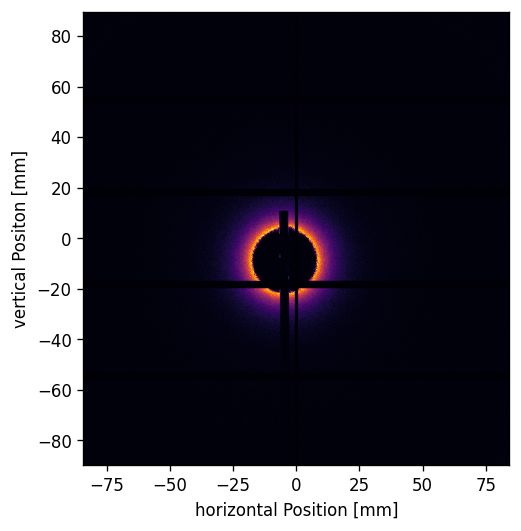

In [33]:
filepath = '/mnt/pilatus/' + filenames[0]

# read the image
im_tiff = Image.open(filepath)
# make the image a numpy array so that we can process it
im_np = np.squeeze(np.array(im_tiff.getdata()).reshape(im_tiff.size[1], im_tiff.size[0], 1))

# dealing with dyanmic range
im_np[np.where(im_np>100.0)] =0

import matplotlib.pyplot as plt
dx_m = 172e-6
Nx_px = 981
Ny_px = 1043
Dx_m = Nx_px*dx_m
Dy_m = Ny_px*dx_m

fig=plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
extent = (-Dx_m/2 * 1e3, +Dx_m/2 * 1e3, -Dy_m/2 * 1e3, +Dy_m/2 * 1e3)

mask = im_np > np.max(im_np)
im_np[mask]=0

plt.imshow(im_np, extent=extent, cmap = 'inferno')
plt.xlabel('horizontal Position [mm]')
plt.ylabel('vertical Positon [mm]')
plt.show()

In [60]:
img = ()
for i_e in range(len(Es_eV)):
    filepath = '/mnt/pilatus/' + filenames[i_e] 
    # read the image
    im_tiff = Image.open(filepath)
    # make the image a numpy array so that we can process it
    im_np = np.squeeze(np.array(im_tiff.getdata()).reshape(im_tiff.size[1], im_tiff.size[0], 1))
    img += (im_np,)


In [61]:
flux = Es_eV*0
for i_e in range(len(Es_eV)):
    flux[i_e] = np.sum(img[i_e])

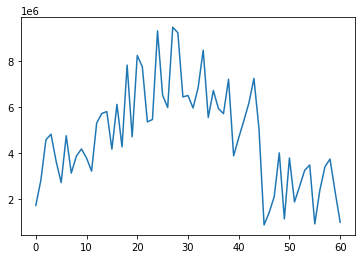

In [62]:
plt.plot(flux)

Text(0, 0.5, 'image number')

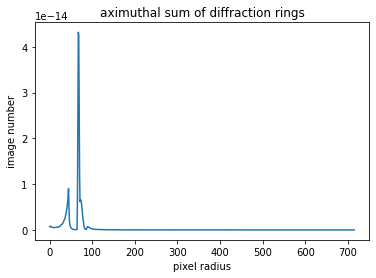

In [91]:
from skimage.transform import warp, warp_polar

im_warp = warp_polar(img[44], center=[466,574])
#1043, 981
im_warp = warp_polar(img[44], center=[1043-466,981-574])
plt.plot(np.sum(im_warp,axis=0))
plt.title('aximuthal sum of diffraction rings')
plt.xlabel('pixel radius')
plt.ylabel('image number')



In [92]:
np.shape(img)

(61, 1043, 981)

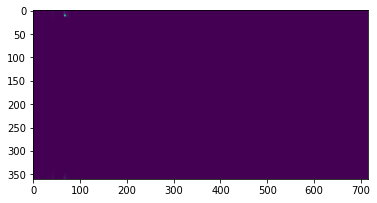

In [93]:
im_warp[im_warp>10]=0
plt.imshow(im_warp)
plt.show()

In [ ]:
# 120-149
# img_sum = ()
# for image in images:
#     #new_image = image_process_no_log(image)
#     new_image = image
#     im_warp = warp_polar(im_np, center=[526,564])
#     #plt.imshow(im_warp)
#     #plt.show()
#     img_sum += (im_warp,)

In [82]:
from skimage import io
#    #print(filepath)
#    img = io.imread(filepath)

#    images += (img,)

In [102]:
file_nb = 120+np.arange(30)
images = ()
for i_f in np.arange(len(file_nb)):
    folder = '/mnt/pilatus/'
    filename ='sample_20231117_%3.0f.tif' % file_nb[i_f]
    img = io.imread(folder+filename)
    images += (img,)


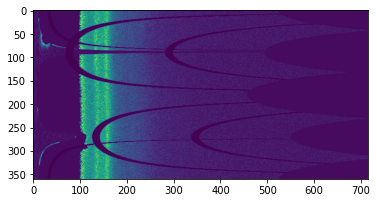

In [120]:
from skimage.transform import warp, warp_polar

#im_warp = warp_polar(images[-5], center=[564,526])
im_warp = warp_polar(images[-5], center=[549,456])



#displaying the azimathal dewarping (for center of been adjustment)
plt.imshow(im_warp)
plt.show()


Text(0, 0.5, 'image number')

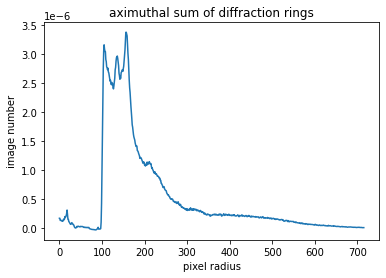

In [121]:
plt.plot(np.sum(im_warp,axis=0))
plt.title('aximuthal sum of diffraction rings')
plt.xlabel('pixel radius')
plt.ylabel('image number')

In [122]:
from skimage.transform import warp, warp_polar
img_sum = ()
for image in images:
    #new_image = image_process_no_log(image)
    new_image = image
    im_warp = warp_polar(new_image, center=[549,456])
    #plt.imshow(im_warp)
    #plt.show()
    img_sum += (im_warp,)

/tmp/ipykernel_603626/1861420229.py:2: RuntimeWarning: invalid value encountered in power
  plt.imshow(np.sum(img_sum,axis=1)**0.1, aspect=5)


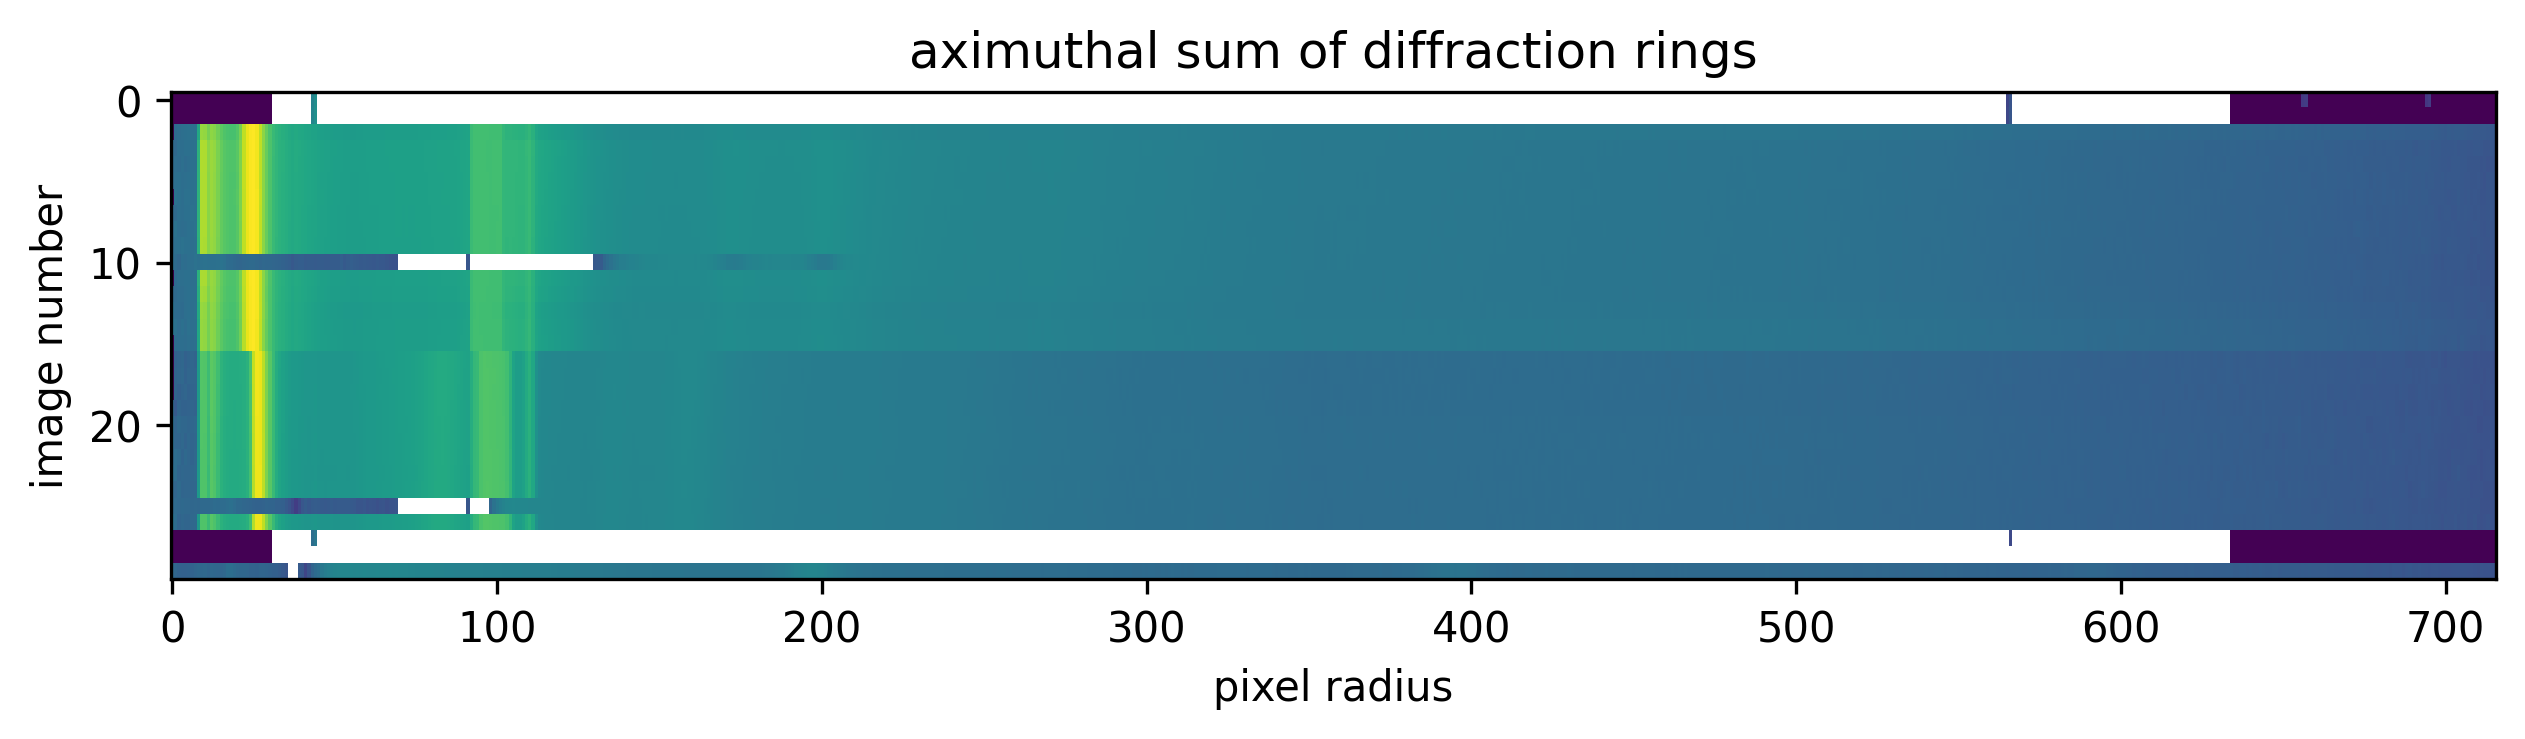

In [125]:
fig=plt.figure(figsize=(10, 10), dpi= 300, facecolor='w', edgecolor='k')
plt.imshow(np.sum(img_sum,axis=1)**0.1, aspect=5)
plt.title('aximuthal sum of diffraction rings')
plt.xlabel('pixel radius')
plt.ylabel('image number')
#plt.imshow(np.sum(np.sum(img_sum,axis=1),axis=0))

plt.show()

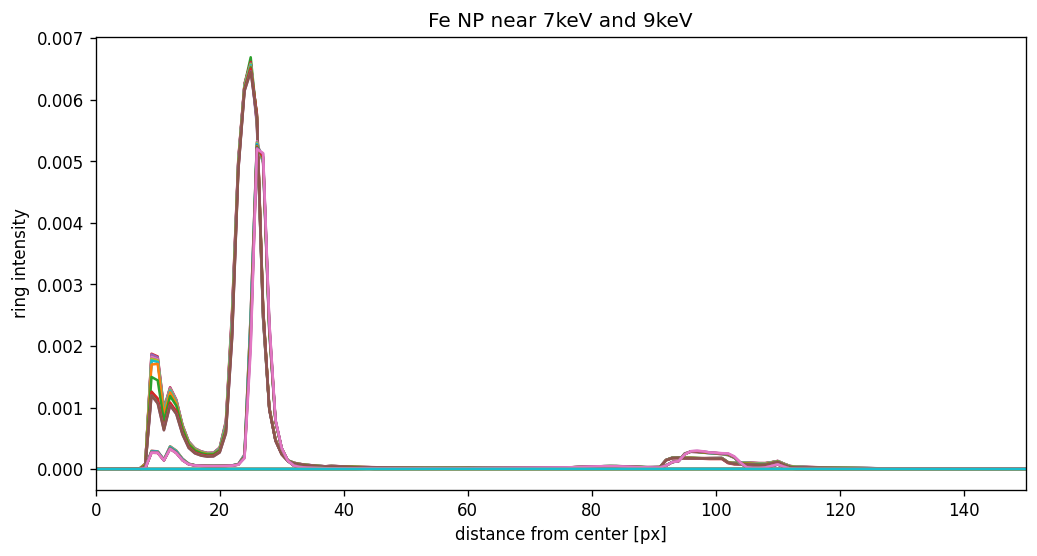

In [135]:
fig=plt.figure(figsize=(10, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(np.transpose(np.sum(img_sum,axis=1)))
plt.xlim([0,150])
plt.xlabel('distance from center [px]')
plt.ylabel('ring intensity')
plt.title('Fe NP near 7keV and 9keV')
plt.show()